### **Deep Learning (AI5100): Assignment-1**


1. Perceptron Learning Algorithm

    Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)

----------------------------------------------------------------------
Level of separability 2.0


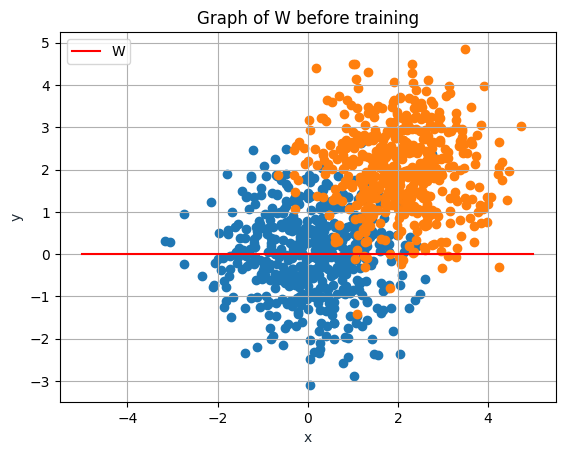

Number of epochs  5
Avg Number of Iterations  117.8


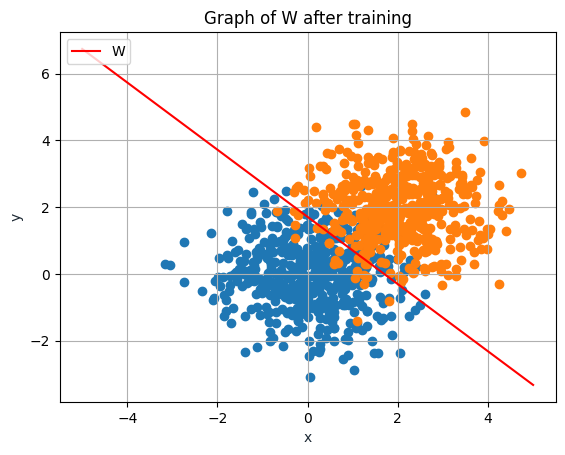

----------------------------------------------------------------------
Level of separability 3.0


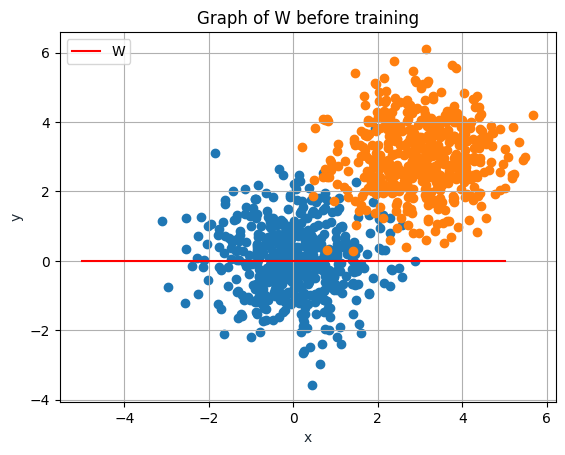

Number of epochs  5
Avg Number of Iterations  41.2


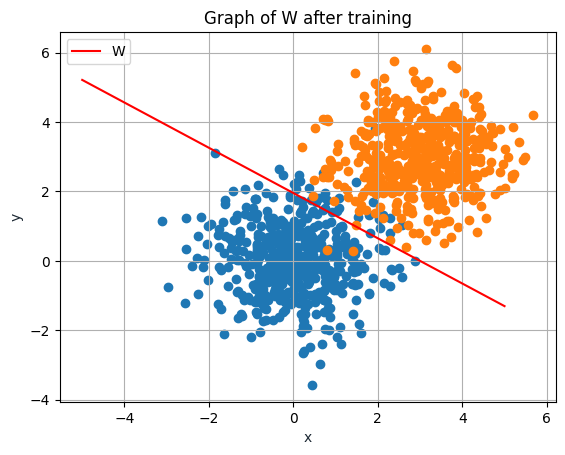

----------------------------------------------------------------------
Level of separability 4.0


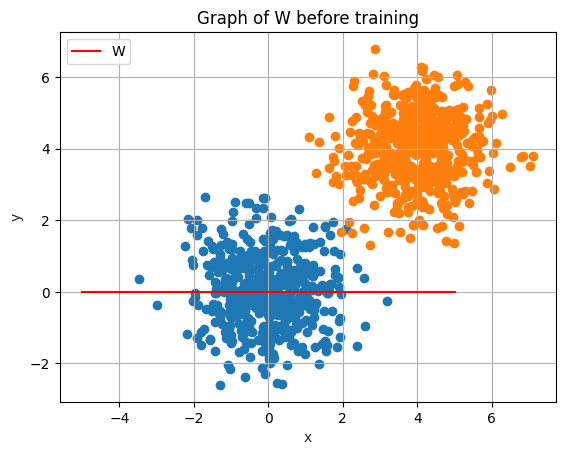

Number of epochs  5
Avg Number of Iterations  11.6


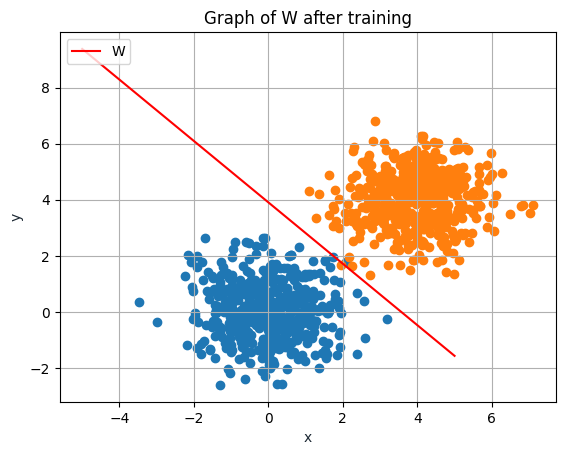

----------------------------------------------------------------------
Level of separability 5.0


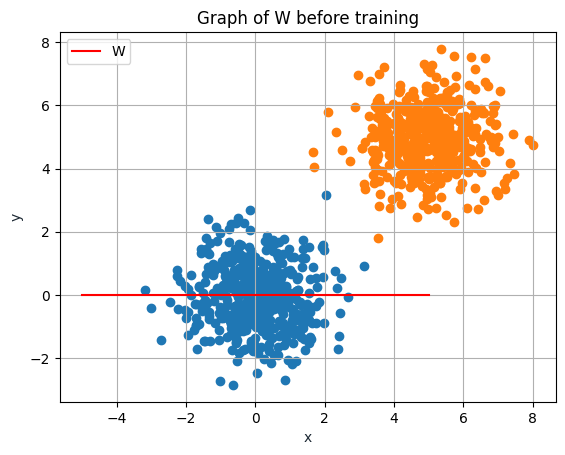

Number of epochs  5
Avg Number of Iterations  9.0


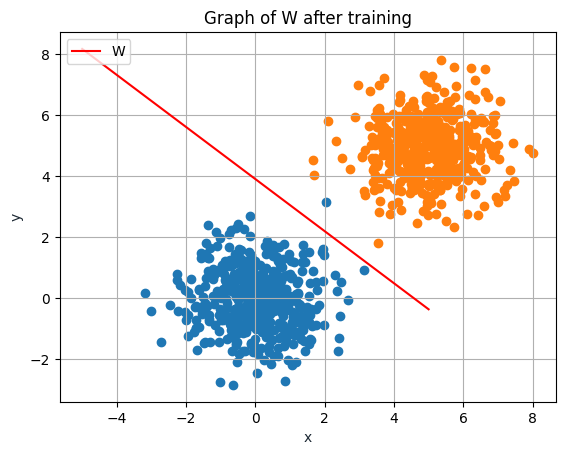

----------------------------------------------------------------------
Level of separability 6.0


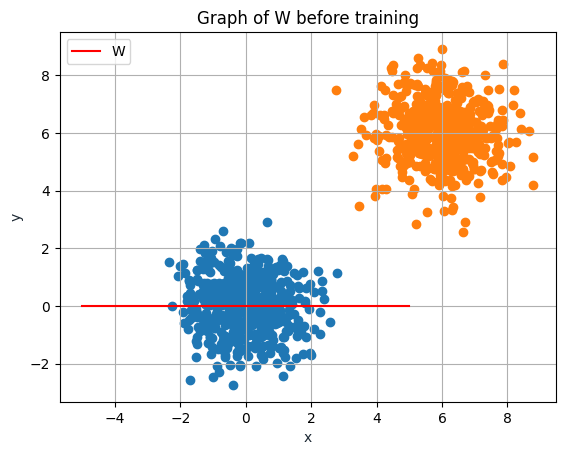

Number of epochs  5
Avg Number of Iterations  3.6


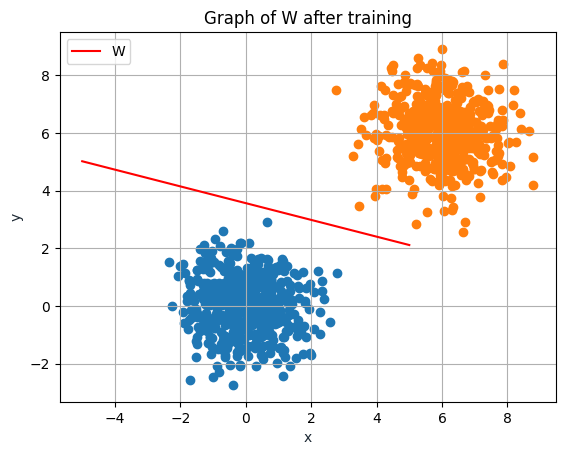

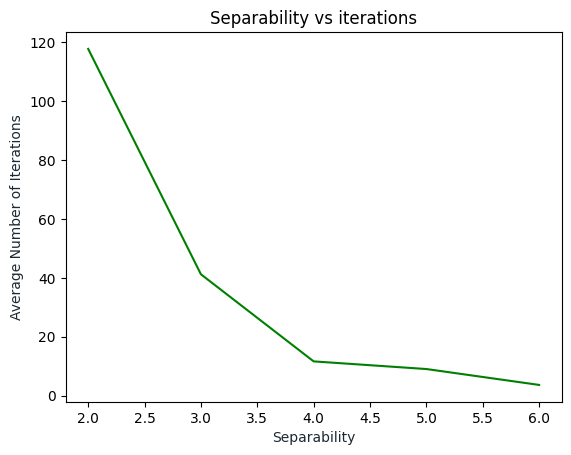

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# two arrays to plot a graph between separability and total errors
change = []
separability = []


def plot_before(D1, D2):
    x = np.linspace(-5, 5, 500)
    y = np.zeros(500,)
    plt.plot(x, y, '-r', label='W')
    plt.title('Graph of W before training')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.scatter(D1[:, 0], D1[:, 1])
    plt.scatter(D2[:, 0], D2[:, 1])
    plt.grid()
    plt.show()


def plot_after(D1, D2, W):
    x = np.linspace(-5, 5, 500)
    y = -(W[0] / W[1]) * x - (W[2] / W[1])
    plt.plot(x, y, '-r', label='W')
    plt.title('Graph of W after training')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.scatter(D1[:, 0], D1[:, 1])
    plt.scatter(D2[:, 0], D2[:, 1])
    plt.grid()
    plt.show()


def perceptron_learning(X, Y, W):
    epochs = 0
    number = 5
    changes = 0
    for j in range(5):
        epochs = epochs + 1
        for i in range(X.shape[0]):
            if np.dot(X[i], W) * Y[i] <= 0:
                W = W + Y[i] * X[i]
                changes = changes + 1
    print("Number of epochs ", epochs)
    print("Avg Number of Iterations ",changes/epochs)
    change.append(changes/epochs)
    return W


for i in range(5):
    # increasing the separability at each iteration
    D1 = np.random.normal(0.0, 1.0, size=[500, 2])
    D2 = np.random.normal(2.0 + i, 1.0, size=[500, 2])
    separability.append(2.0 + (i))
    print("----------------------------------------------------------------------")
    print("Level of separability",separability[i])
    X = np.ones((1000, D1.shape[1] + 1))
    X[::2, :2] = D1
    X[1::2, :2] = D2
    Y = np.ones((1000, 1))
    Y[::2, :2] = 1.0
    Y[1::2, :2] = -1.0
    W = np.zeros(X.shape[1])
    plot_before(D1, D2)
    W = perceptron_learning(X, Y, W)
    plot_after(D1, D2, W)

plt.plot(separability, change, '-g')
plt.xlabel('Separability', color='#1C2833')
plt.ylabel('Average Number of Iterations', color='#1C2833')
plt.title("Separability vs iterations")
plt.show()


2. Gradient descent for training a linear classifier

    Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our classroom discussion on the desirable properties of a loss function. You may implement the an-
alytical way of finding gradient for it. You may implement the basic version of gradient descent update equation. Plot the dataset before and after training (with the classifier).

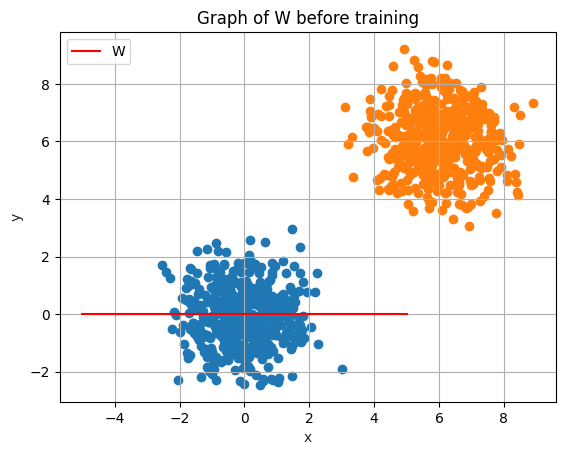

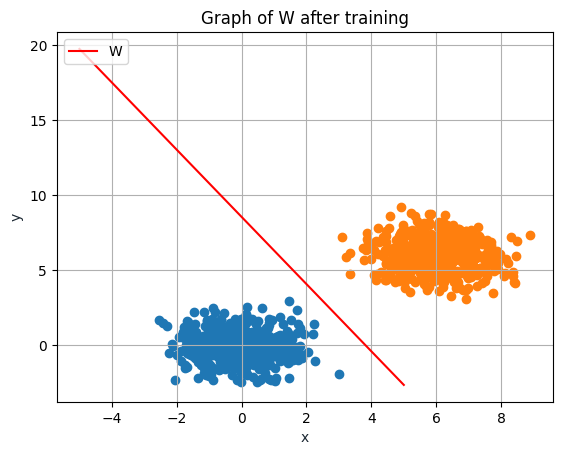

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Function to perform perceptron learning
def perceptron_learning(X, Y, lr, iterations):
    W = np.zeros(X.shape[1])

    for _ in range(iterations):
        for j in range(100):
            y_pred = np.dot(W, X[j])
            grad = -Y[j] * (1 - Y[j] * y_pred > 0) # hinge loss
            W -= lr * grad * X[j]

    return W

# Generate data
D1 = np.random.normal(0.0, 1.0, size=[500, 2])
D2 = np.random.normal(6.0, 1.0, size=[500, 2])
X = np.ones((1000, D1.shape[1] + 1))
X[::2, :2] = D1
X[1::2, :2] = D2
Y = np.ones((1000, 1))
Y[::2, :2] = 1.0
Y[1::2, :2] = -1.0

# Set learning rate and number of iterations
lr = 0.01
iterations = 100

# Plot before training
plot_before(D1, D2)

# Perform perceptron learning
W = perceptron_learning(X, Y, lr, iterations)

# Plot after training
plot_after(D1, D2, W)


3. MLP with a single hidden layer

    This question has two variations, and you are expected to attempt any one of the variations. The
second variation, if implemented properly, will fetch you a 5% bonus on this assignment.
Original Question: Consider a binary classification dataset that is not linearly separable in 2D
(e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP)
with a single hidden layer for classifying the same. You may use the loss function used in problem 2. You have to implement the backpropagation algorithm yourself.
Variation: Implement your own toy autograd engine, and use it to solve the original question.
You are welcome to discuss the approach with TAs if you like.

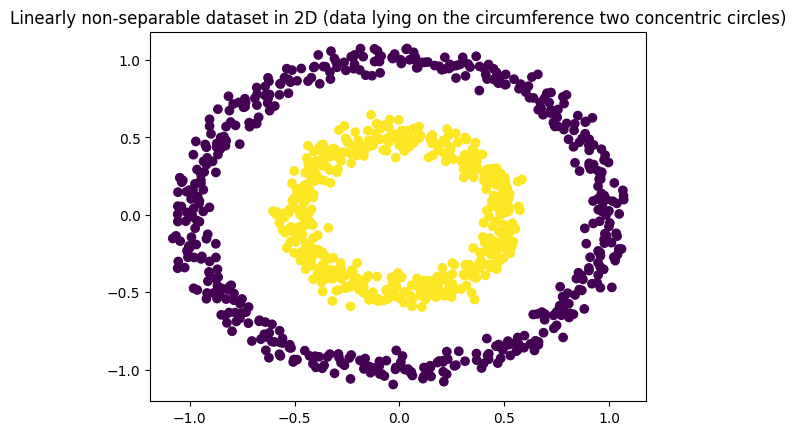

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Define the number of neurons for each layer
input_size = 2
hidden_size = 4
output_size = 2
iteration = []
losses = []
# number of points for each circle
n_points = 500

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5)
'''
Noise - It controls the amount of random variation or perturbation added to the data points.
The higher the value of noise, the more scattered or dispersed the points will be from the ideal shapes (circles, in this case).

a factor -  controlling the relative size of the circles

The resulting X contains the coordinates of the points, and
y contains the binary labels indicating the class (0 or 1).
'''

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Linearly non-separable dataset in 2D (data lying on the circumference two concentric circles)")
plt.show()
y_true = []
for i in range(1000):
  if(y[i]==0):
    y_true.append([0,1])
  else:
    y_true.append([1,0])
y_true = np.array(y_true)


In [12]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def cross_entropy_loss(outputs, labels):
    loss = 0
    for i in range(1000):
      for j in range(2):
        loss += (labels[i][j] * np.log(outputs[i][j]))
    return -loss/1000

def feedforward(w1,w2,b1,b2,inputs,labels):
  hidden_output = np.matmul(inputs, w1) + b1
  a1 = hidden_output

  # apply ReLU activation function to hidden_output
  for i in range(hidden_output.shape[0]):
    for j in range(hidden_output.shape[1]):
        if hidden_output[i][j] < 0:
            hidden_output[i][j] = 0
  h1 = hidden_output
  outputs = np.matmul(hidden_output, w2) + b2
  a2 = outputs
  softmax_output = np.exp(a2) / np.sum(np.exp(a2), axis=1, keepdims=True)
  h2 = softmax_output
  loss = cross_entropy_loss(h2,labels)
  losses.append(loss)

  return a1,h1,a2,h2

def diff_relu(x):
  return np.array(x>0,dtype=np.float32)




# define the weights and biases for the input-hidden layer
w1 = np.random.rand(2, 4)
b1 = np.random.rand(1,4)

# define the weights and biases for the hidden-output layer
w2 = np.random.rand(4, 2)
b2 = np.random.rand(1,2)

iterations = 1000
for i in range(iterations):
  iteration.append(i)
  a1,h1,a2,h2 = feedforward(w1,w2,b1,b2,X,y_true)
  #Backward propagation
  derivative_w2 = h2-y_true
  derivative_b2 = derivative_w2/1000
  derivative_w2 = np.matmul(derivative_w2.T,h1)
  derivative_w2 = derivative_w2/1000
  sum1 = 0
  sum2 = 0;
  for i in range(1000):
    sum1 = sum1+derivative_b2[i][0]
    sum2 = sum2+derivative_b2[i][1]
  sum1 = sum1/1000
  sum2 = sum2/1000
  derivative_b2 = np.array([sum1,sum2],dtype = np.float32)

  derivative_w1 = h2-y_true
  derivative_w1 = np.matmul(derivative_w1,w2.T)*diff_relu(a1)
  derivative_b1 = derivative_w1
  sum1 = 0
  sum2 = 0
  sum3 = 0
  sum4 = 0
  for i in range(200):
    sum1 = sum1+derivative_b1[i][0]
    sum2 = sum2+derivative_b1[i][1]
    sum3 = sum3+derivative_b1[i][2]
    sum4 = sum4+derivative_b1[i][3]
  sum1 = sum1/1000
  sum2 = sum2/1000
  sum3 = sum3/1000
  sum4 = sum4/1000
  derivative_b1 = np.array([sum1,sum2,sum3,sum4],dtype = np.float32)
  derivative_w1 = np.matmul(derivative_w1.T,X)
  derivative_w1 = derivative_w1/1000

  w1 = w1-0.2*(derivative_w1.T)
  w2 = w2-0.2*(derivative_w2.T)
  b1 = b1-0.2*(derivative_b1)
  b2 = b2-0.2*(derivative_b2)

 Graph between number of iterations and the loss

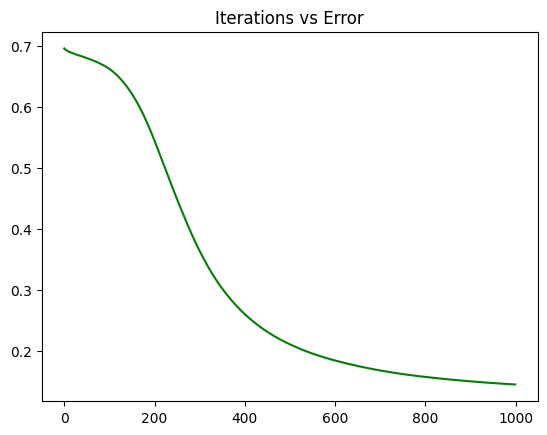

In [9]:
plt.plot(iteration,losses,'-g')
plt.title("Iterations vs Error")
plt.show()

Generating some new data to test the accuracy of our model

In [11]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5)
y_true_new = []
for i in range(1000):
  if(y[i]==0):
    y_true_new.append([0,1])
  else:
    y_true_new.append([1,0])

y_true_new = np.array(y_true_new)
a,b,c,d = feedforward(w1,w2,b1,b2,X,y_true_new)
ytrue = []
for i in range(1000):
  if(y_true_new[i][0] == 0):
    ytrue.append(1)
  else:
    ytrue.append(0)
y_pred = []
for i in range(1000):
  if(d[i][0]>d[i][1]):
   y_pred.append(0)
  else:
   y_pred.append(1)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytrue,y_pred))

0.871
